In [1]:
import mne
import numpy as np
from mne.channels import make_standard_montage
import matplotlib.pyplot as plt
from mne.datasets import eegbci

raw = mne.io.read_raw_bdf("C:\\Users\\pipo_\\OneDrive\\Desktop\\test_data\\Testdata2.bdf", preload= True)

eegbci.standardize(raw)  # set channel names
montage = make_standard_montage("biosemi64")

raw.set_montage(montage, on_missing='ignore')

Extracting EDF parameters from C:\Users\pipo_\OneDrive\Desktop\test_data\Testdata2.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 456703  =      0.000 ...   223.000 secs...


Measurement date,"August 16, 2024 15:38:40 GMT"
Experimenter,Unknown
Participant,
Digitized points,67 points
Good channels,"72 EEG, 1 Stimulus"
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,2048.00 Hz
Highpass,0.00 Hz
Lowpass,417.00 Hz


Effective window size : 1.000 (s)


C:\Users\pipo_\AppData\Roaming\Python\Python311\site-packages\mne\viz\utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


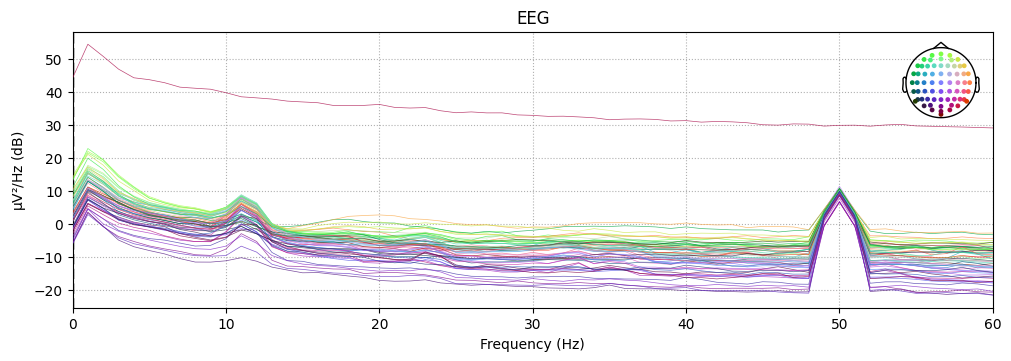

In [2]:
raw.compute_psd(fmax=60).plot(picks=raw.ch_names[0:64])
plt.show()

In [3]:
events_raw = mne.find_events(raw)
events = np.delete(events_raw, [0, 1 ,4], axis= 0) #remove first event because that is power status

event_dict =  {'12Hz': 8,
'24Hz': 4,
'6Hz': 10,
'30Hz': 2,
'trial_begin': 1,
'trial_end': 20,
'end_exper': 40
}

events

Trigger channel STATUS has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
66 events found on stim channel STATUS
Event IDs: [    1     2     4     8    10    20    40 65537]


array([[ 13971,      0,     20],
       [ 18072,      0,      1],
       [ 96172,      0,      1],
       [ 98219,      0,      4],
       [108463,      0,     20],
       [112560,      0,      1],
       [114612,      0,      8],
       [124849,      0,     20],
       [128949,      0,      1],
       [130997,      0,      2],
       [141241,      0,     20],
       [145340,      0,      1],
       [147395,      0,      4],
       [157631,      0,     20],
       [161730,      0,      1],
       [163782,      0,     10],
       [174020,      0,     20],
       [178120,      0,      1],
       [180173,      0,      4],
       [190409,      0,     20],
       [194507,      0,      1],
       [196556,      0,      4],
       [206800,      0,     20],
       [210898,      0,      1],
       [212946,      0,     10],
       [223187,      0,     20],
       [227285,      0,      1],
       [229337,      0,     10],
       [239577,      0,     20],
       [243676,      0,      1],
       [24

In [4]:
Epochs = mne.Epochs(raw, events, 
    tmin= -1.0,  
    tmax= 5.0,    
    event_id=event_dict,
    preload = True,
    event_repeated='drop',
    baseline=(-1.0, 0.0),
    verbose=True
    )

Not setting metadata
63 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 63 events and 12289 original time points ...
0 bad epochs dropped


In [5]:
Epochs

Number of events,63
Events,12Hz: 524Hz: 530Hz: 56Hz: 5end_exper: 1trial_begin: 21trial_end: 21
Time range,-1.000 – 5.000 s
Baseline,-1.000 – 0.000 s


In [6]:
Epochs = Epochs.copy().crop(tmin = 0.0, tmax = 5.0)

    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs...


C:\Users\pipo_\AppData\Roaming\Python\Python311\site-packages\mne\viz\utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


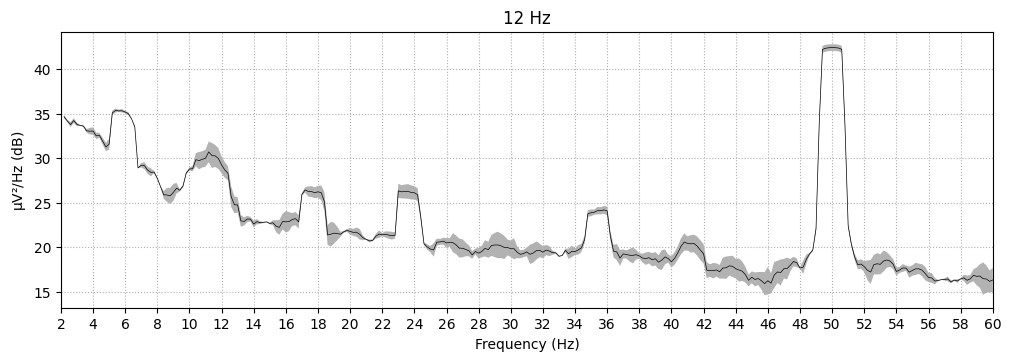

In [7]:
# Compute the PSD
psd = Epochs['12Hz'].pick(['O1', 'Oz']).compute_psd(fmin=2.0, fmax=60.0)

# Plot the PSD
fig = psd.plot(average=True, amplitude=False, picks="data", exclude="bads")

# Customize the x-axis labels
ax = fig.axes[0]  # Get the axis of the first subplot
ax.set_xticks(np.arange(2, 61, 2))  # Set x-axis ticks from 2 to 60
ax.set_xticklabels(np.arange(2, 61, 2))  # Set x-axis labels from 2 to 60
ax.set_title('12 Hz')

plt.show()

    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs...


C:\Users\pipo_\AppData\Roaming\Python\Python311\site-packages\mne\viz\utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


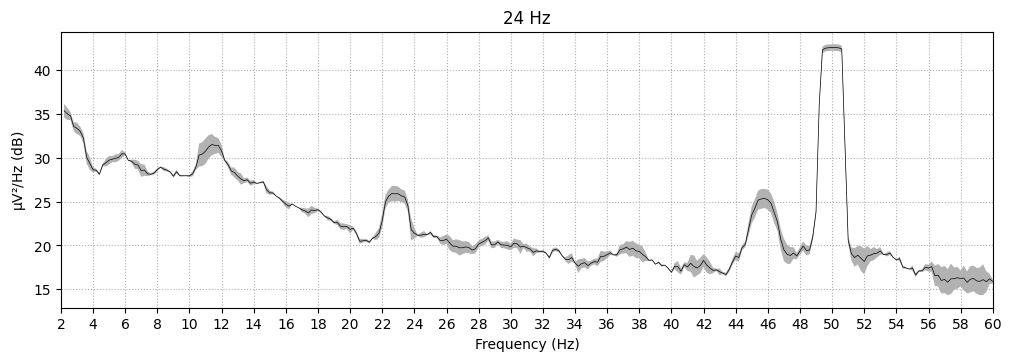

In [8]:
# Compute the PSD
psd = Epochs['24Hz'].pick(['O1', 'Oz']).compute_psd(fmin=2.0, fmax=60.0)

# Plot the PSD
fig = psd.plot(average=True, amplitude=False, picks="data", exclude="bads")

# Customize the x-axis labels
ax = fig.axes[0]  # Get the axis of the first subplot
ax.set_xticks(np.arange(2, 61, 2))  # Set x-axis ticks from 2 to 60
ax.set_xticklabels(np.arange(2, 61, 2))  # Set x-axis labels from 2 to 60
ax.set_title('24 Hz')

plt.show()

    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs...


C:\Users\pipo_\AppData\Roaming\Python\Python311\site-packages\mne\viz\utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


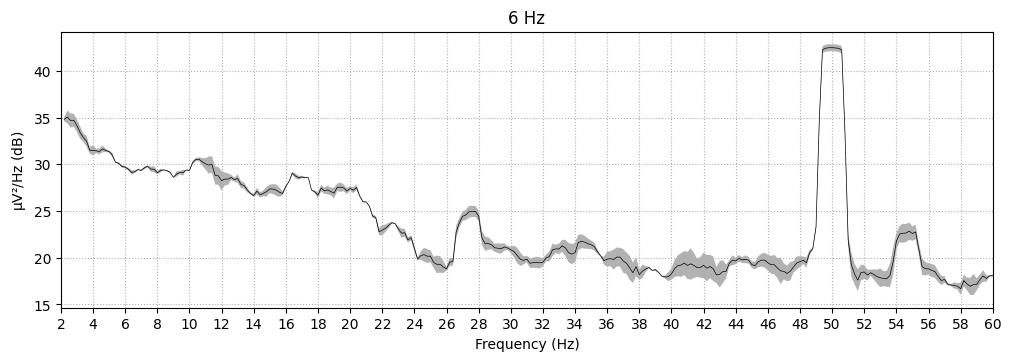

In [9]:
# Compute the PSD
psd = Epochs['6Hz'].pick(['O1', 'Oz']).compute_psd(fmin=2.0, fmax=60.0)

# Plot the PSD
fig = psd.plot(average=True, amplitude=False, picks="data", exclude="bads")

# Customize the x-axis labels
ax = fig.axes[0]  # Get the axis of the first subplot
ax.set_xticks(np.arange(2, 61, 2))  # Set x-axis ticks from 2 to 60
ax.set_xticklabels(np.arange(2, 61, 2))  # Set x-axis labels from 2 to 60
ax.set_title('6 Hz')

plt.show()

    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs...


C:\Users\pipo_\AppData\Roaming\Python\Python311\site-packages\mne\viz\utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


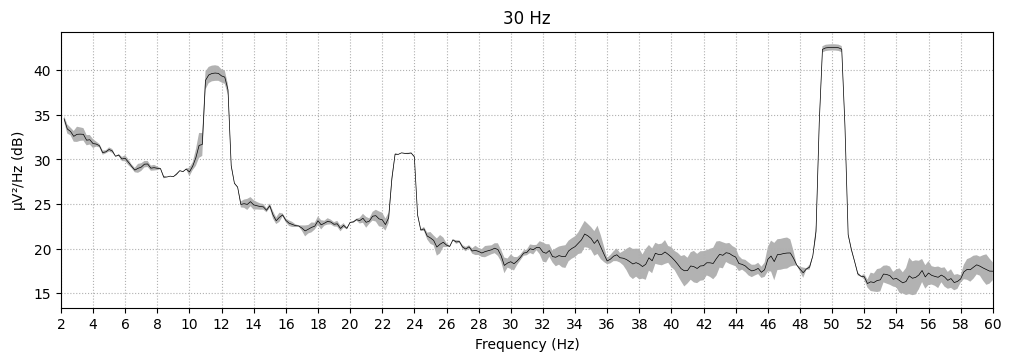

In [10]:
# Compute the PSD
psd = Epochs['30Hz'].pick(['O1', 'Oz']).compute_psd(fmin=2.0, fmax=60.0)

# Plot the PSD
fig = psd.plot(average=True, amplitude=False, picks="data", exclude="bads")

# Customize the x-axis labels
ax = fig.axes[0]  # Get the axis of the first subplot
ax.set_xticks(np.arange(2, 61, 2))  # Set x-axis ticks from 2 to 60
ax.set_xticklabels(np.arange(2, 61, 2))  # Set x-axis labels from 2 to 60
ax.set_title('30 Hz')

plt.show()